# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [49]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [6]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [38]:
df=app_train['AMT_INCOME_TOTAL']
df.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
print(1.687979e+05+3*2.371231e+05)
print(1.687979e+05-3*2.371231e+05)

880167.2000000001
-542571.4


In [ ]:
從這裡看，大於880167基本上都可以算是離散值

In [39]:
df1=pd.cut(df,4)
df1.value_counts()

(-91324.35, 29269237.5]      307510
(87756412.5, 117000000.0]         1
(58512825.0, 87756412.5]          0
(29269237.5, 58512825.0]          0
Name: AMT_INCOME_TOTAL, dtype: int64

這裡顯示離散值大過於大多數人存在的range的4倍

In [66]:
df1_1=pd.cut(df[df<880167],4)
df1_1.value_counts()

(24798.15, 238612.5]    261907
(238612.5, 451575.0]     42467
(451575.0, 664537.5]      1720
(664537.5, 877500.0]       963
Name: AMT_INCOME_TOTAL, dtype: int64

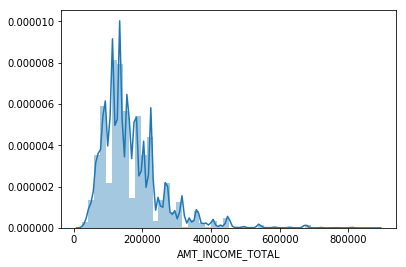

In [67]:
sns.distplot(df[df<880167])

In [63]:
df2=pd.cut(app_train['REGION_POPULATION_RELATIVE'],4)
df2.value_counts().sort_index()

(0.000218, 0.0183]    136343
(0.0183, 0.0364]      149314
(0.0364, 0.0545]       13442
(0.0545, 0.0725]        8412
Name: REGION_POPULATION_RELATIVE, dtype: int64

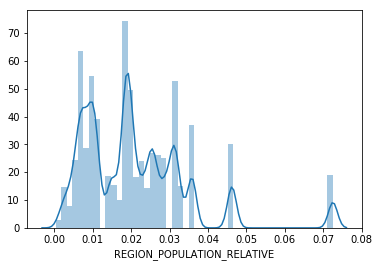

In [59]:
sns.distplot(app_train['REGION_POPULATION_RELATIVE'])

In [68]:
app_train['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

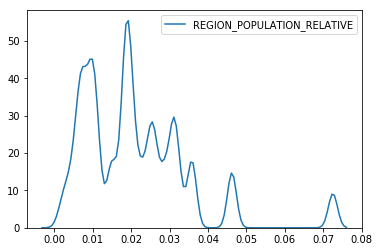

In [64]:
sns.kdeplot(app_train['REGION_POPULATION_RELATIVE'])

In [71]:
df2=app_train['REGION_POPULATION_RELATIVE']
df2.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [78]:
pd.cut(df2,4).value_counts().sort_index()

(0.000218, 0.0183]    136343
(0.0183, 0.0364]      149314
(0.0364, 0.0545]       13442
(0.0545, 0.0725]        8412
Name: REGION_POPULATION_RELATIVE, dtype: int64

In [72]:
print(0.020868+3*0.013831)
print(0.020868-3*0.013831)

0.062361
-0.020625


In [79]:
pd.cut(df2[df2<0.062361],4).value_counts().sort_index()

(0.000244, 0.0118]    104685
(0.0118, 0.0233]       93332
(0.0233, 0.0347]       71232
(0.0347, 0.0462]       29850
Name: REGION_POPULATION_RELATIVE, dtype: int64

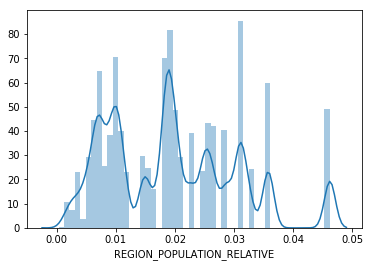

In [76]:
sns.distplot(df2[df2<0.062361])